In [2]:
from astropy import coordinates as coord
from astropy import units as u
from astropy.time import Time
import pandas as pd


In [3]:
# 1. get the coordinates of the moon for 30 days from a specific day - ra,dec is shown -  complete the lat lon
# 2. get the coordinates of the Alcyone for -2000 to 2000 years in steps of 1000 years - ra,dec is shown -  complete the lat lon

acc = []
t = Time('2020-01-01 00:00:00')

# Get the coordinates of Alcyone at a specific time
for i in range(0,30):
    t = t + 1*u.day
    moon = coord.get_body('Moon', t)
    acc.append([ t, moon.ra, moon.dec, 'todo', 'todo'])

pd.DataFrame(acc, columns=['time', 'ra', 'dec' , 'lat', 'lon'])

,time,ra,dec,lat,lon
0,2020-01-02 00:00:00.000,0d00m20.47733193s,-5d39m59.90514418s,todo,todo
1,2020-01-03 00:00:00.000,10d54m40.65936789s,-1d03m01.2410584s,todo,todo
2,2020-01-04 00:00:00.000,21d50m59.13092388s,3d37m52.84203369s,todo,todo
3,2020-01-05 00:00:00.000,33d02m53.20804507s,8d14m19.39407226s,todo,todo
4,2020-01-06 00:00:00.000,44d43m51.53718994s,12d36m36.67710109s,todo,todo
5,2020-01-07 00:00:00.000,57d06m07.08878498s,16d32m49.17716075s,todo,todo
6,2020-01-08 00:00:00.000,70d18m30.52503118s,19d48m22.37932462s,todo,todo
7,2020-01-09 00:00:00.000,84d23m17.74216916s,22d06m42.21518424s,todo,todo
8,2020-01-10 00:00:00.000,99d12m54.07723665s,23d11m35.86980171s,todo,todo
9,2020-01-11 00:00:00.000,114d29m12.04608663s,22d51m10.28129175s,todo,todo


In [46]:
# 2. get the coordinates of the Alcyone for -3000 to 2000 years in steps of 1000 years - ra,dec is shown -  complete the lat lon

# supress warnings
import warnings
warnings.filterwarnings('ignore')

from astropy.coordinates import SkyCoord

t2k = Time('2000-01-01 00:00:00')
obj_coords = SkyCoord.from_name('Alcyone')
print (f"RA={obj_coords.ra.deg:.4f}, DEC={obj_coords.dec.deg:.4f}, LAT={obj_coords.geocentrictrueecliptic.lat.deg:.2f}, LON={obj_coords.geocentrictrueecliptic.lon.deg:.2f}")

acc = []
for yr in range(-3000, 2000, 1000):
    t = Time(t2k.jd + 365.25 * yr, format='jd')
    latlon = obj_coords.transform_to(coord.GeocentricTrueEcliptic(equinox=t))
    radec = obj_coords.transform_to(coord.FK5(equinox=t))
    ra, dec = radec.ra, radec.dec
    lat, lon = latlon.lat, latlon.lon
    acc.append([ t.isot, ra.deg, dec.deg, lat.deg, lon.deg])

xdf = pd.DataFrame(acc, columns=['time', 'ra', 'dec' , 'lat', 'lon'])
xdf


RA=56.8712, DEC=24.1051, LAT=4.05, LON=59.99


,time,ra,dec,lat,lon
0,-1001-12-09T00:00:00.000,15.440395,10.733118,3.713204,18.376016
1,-1-12-17T00:00:00.000,28.572793,15.938624,3.821443,32.194051
2,999-12-24T00:00:00.000,42.347772,20.494581,3.934402,46.060669
3,2000-01-01T00:00:00.000,56.871141,24.105128,4.051219,59.992924
4,3000-01-08T00:00:00.000,72.098078,26.495992,4.170967,73.996305


<Axes: >

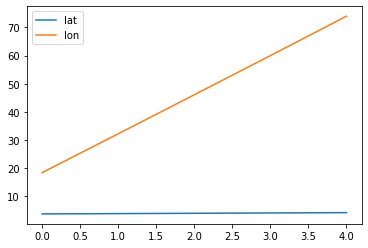

In [49]:
xdf[['lat', 'lon']].plot()

In [ ]:
#Ex 3. For a period of 100 years, sample the position ( lat ,lon for that epoch) of the sun and moon every N days 
# and compute the angular separation between the two. 
# Plot the anfular separation vs time for N  = 100, 10, 1

#date sun_lat, sun_lon, moon_lat, moon_lon, sun_moon_angsep 

